In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tensornetworks_pytorch.TNModels import PosMPS, Born
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

print(torch.__version__)

1.8.0.dev20201128


In [2]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', DEVICE)
if DEVICE.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0) / 1024**3, 1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0) / 1024**3, 1), 'GB')

Using device: cpu


In [3]:
### import data
import pickle
for dataset in ['biofam','flare','lymphography','spect','tumor','votes']:
    with open('datasets/'+dataset, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1' # biofam seemed to have an encoding issue which this fixes
        a = u.load()
    X=a[0].astype(int)
    print(f"╭──{dataset}")
    print(f"│ data shape:{X.shape}")
    print(f"│ range of X values: {X.min()} -- {X.max()}")
    print(f"╰───────────────────")
    
def load_dataset(dataset):
    with open('datasets/'+dataset, 'rb') as f:
        u = pickle._Unpickler(f)
        u.encoding = 'latin1'
        a = u.load()
    X=a[0]
    X=X.astype(int)
    print(f"╭──{dataset}")
    print(f"│ data shape:{X.shape}")
    print(f"│ range of X values: {X.min()} -- {X.max()}")
    print(f"╰───────────────────")
    d = X.max()+1
    return X, d

def train_models(
        models, batchsize=20, max_epochs=50, 
        batched=False, clamp_at=None, verbose=False, 
        optimizer=torch.optim.Adadelta, **optim_kwargs):
    print(f"dataset: {dataset}")
    models_loss_values={}
    for model in models:
        loss_values = model.train(
            batchsize=batchsize, max_epochs=max_epochs, tqdm=tqdm, plot=False,
            clamp_at=clamp_at, batched=batched, verbose=verbose, 
            optimizer=optimizer, **optim_kwargs)
        plt.plot(loss_values, label=model.name)
        plt.ylabel('avg loss (negative log likelihood)')
        plt.xlabel('Epoch')
        plt.title(f"dataset: {dataset} (d={d}), bond dim={D}, batched={batched}\n batchsize:{batchsize}, {optimizer.__module__} {optim_kwargs}")
        models_loss_values[f"{model.name}"]=loss_values
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.show()
    return models_loss_values

╭──biofam
│ data shape:(2000, 16)
│ range of X values: 0 -- 7
╰───────────────────
╭──flare
│ data shape:(1065, 13)
│ range of X values: 0 -- 7
╰───────────────────
╭──lymphography
│ data shape:(148, 19)
│ range of X values: 0 -- 7
╰───────────────────
╭──spect
│ data shape:(187, 23)
│ range of X values: 0 -- 1
╰───────────────────
╭──tumor
│ data shape:(339, 17)
│ range of X values: 0 -- 3
╰───────────────────
╭──votes
│ data shape:(435, 17)
│ range of X values: 0 -- 2
╰───────────────────


╭──lymphography
│ data shape:(148, 19)
│ range of X values: 0 -- 7
╰───────────────────
dataset: lymphography
╭───────────────────────────batched=True
│Training Born (torch.complex64), Non-homogeneous + log_stability, on cpu
│         batchsize:10, torch.optim.adam, {'lr': 1e-06}.



│ loss values: 40.035 40.020 40.007 39.987 39.969 39.959 39.937 39.923 39.907 39.891 39.874 39.857 39.843 39.825 39.809 39.792 39.775 39.759 39.746 39.729 39.711 39.697 39.679 39.663 39.648 39.631 39.611 39.596 39.583 39.566 39.551 39.532 39.518 39.500 39.488 39.470 39.454 39.437 39.420 39.404 39.390 39.371 39.356 39.342 39.323 39.308 39.292 39.278 39.259 39.245 39.229 39.210 39.197 39.179 39.163 39.146 39.133 39.118 39.102 39.084 39.068 39.052 39.037 39.020 39.006 38.987 38.972 38.958 38.941 38.926 38.910 38.893 38.876 38.861 38.847 38.830 38.814 38.797 38.785 38.765 38.753 38.735 38.718 38.705 38.686 38.673 38.656 38.641 38.625 38.608 38.593 38.578 38.564 38.547 38.531 38.513 38.500 38.482 38.469 38.450 38.433 38.419 38.407 38.388 38.374 38.358 38.342 38.327 38.311 38.294 38.275 38.262 38.249 38.232 38.218 38.201 38.184 38.170 38.156 38.140 38.122 38.107 38.093 38.075 38.060 38.047 38.031 38.012 37.998 37.983 37.969 37.957 37.938 37.921 37.906 37.892 37.875 37.862 37.845 37.832 37.8


│ loss values: 40.002 39.989 39.976 39.964 39.953 39.938 39.923 39.914 39.899 39.885 39.875 39.862 39.846 39.835 39.822 39.811 39.796 39.785 39.771 39.757 39.745 39.734 39.719 39.707 39.695 39.683 39.670 39.655 39.643 39.634 39.619 39.608 39.592 39.580 39.568 39.553 39.543 39.534 39.521 39.505 39.492 39.478 39.467 39.458 39.443 39.431 39.417 39.407 39.396 39.378 39.372 39.354 39.340 39.331 39.317 39.303 39.293 39.278 39.265 39.254 39.241 39.231 39.217 39.208 39.196 39.183 39.169 39.162 39.141 39.133 39.121 39.108 39.095 39.083 39.068 39.057 39.048 39.032 39.020 39.011 38.997 38.985 38.971 38.960 38.948 38.934 38.923 38.908 38.899 38.889 38.874 38.865 38.851 38.837 38.826 38.816 38.801 38.788 38.778 38.768 38.750 38.747 38.728 38.714 38.709 38.693 38.681 38.668 38.660 38.648 38.632 38.627 38.614 38.595 38.585 38.572 38.560 38.550 38.536 38.525 38.512 38.499 38.492 38.480 38.464 38.452 38.442 38.432 38.420 38.405 38.393 38.383 38.373 38.363 38.349 38.338 38.325 38.312 38.302 38.284 38.2

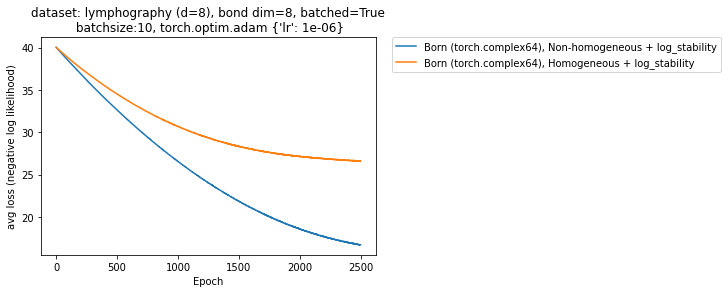

In [24]:
dataset = 'lymphography'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1)
cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1)

lossvals = train_models(
    [#mps_s, mps_s_hom, 
    #rBorn_s, 
    cBorn_s,
    #rBorn_s_hom, 
    cBorn_s_hom
    ],
    clamp_at=None, batchsize=10, max_epochs=2500, batched=True, optimizer=torch.optim.Adam, lr=1e-6)


In [ ]:
dataset = 'flare'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)

lossvals = train_models(
    [mps_s, mps_s_hom, rBorn_s, cBorn_s,rBorn_s_hom, cBorn_s_hom],
    clamp_at=None, batchsize=20, max_epochs=1000, batched=True, optimizer=torch.optim.Adam, lr=1e-5)


In [ ]:
dataset = 'spect'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)

lossvals = train_models(
    [mps_s, mps_s_hom, rBorn_s, cBorn_s, rBorn_s_hom, cBorn_s_hom],
    clamp_at=None, batchsize=10, max_epochs=4000, batched=True, optimizer=torch.optim.Adam, lr=1e-6)


In [ ]:
dataset = 'tumor'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)

lossvals = train_models(
    [mps_s, mps_s_hom, rBorn_s, cBorn_s, rBorn_s_hom, cBorn_s_hom],
    clamp_at=None, batchsize=10, max_epochs=1000, batched=True, optimizer=torch.optim.Adam, lr=1e-5)


In [ ]:
dataset = 'votes'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)

lossvals = train_models(
    [mps_s, mps_s_hom, rBorn_s, cBorn_s, rBorn_s_hom, cBorn_s_hom],
    clamp_at=None, batchsize=10, max_epochs=2000, batched=True, optimizer=torch.optim.Adam, lr=1e-5)


In [ ]:
dataset = 'lymphography'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e8)
cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1)
cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1)

lossvals = train_models(
    [mps_s, mps_s_hom, 
    rBorn_s, 
    cBorn_s,
    rBorn_s_hom, 
    cBorn_s_hom
    ],
    clamp_at=None, batchsize=20, max_epochs=6000, batched=True, optimizer=torch.optim.Adam, lr=1e-6)

In [ ]:
dataset = 'biofam'
X,d = load_dataset(dataset)
D = 8

wr = 'noisy' # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

Bmps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e10)
Bmps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e10)
BrBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e10)
BrBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=1e10)
BcBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr, gradient_clipping_threshold=10)
BcBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr, gradient_clipping_threshold=10)

lossvals = train_models(
    [Bmps_s, 
     Bmps_s_hom,
     BrBorn_s, 
     BrBorn_s_hom,
     BcBorn_s, 
     BcBorn_s_hom
    ],
    clamp_at=None, batchsize=50, max_epochs=1500, batched=True, verbose=False, optimizer=torch.optim.Adam, lr=1e-6)

## Useful things?

In [ ]:
# Testing item selection

d=6
bs=3
slen=5
D=2

X = torch.randint(d,(bs,slen))
print(X)
weights = torch.arange(bs*slen*d*D*D).view(bs,slen,d,D,D)#.type(torch.cfloat)
# print(weights)
# what we want to do is, 
# in the bth batch and the ith core, 
# choose the X[b,i]th weight element
print("Selected weight items:")
for b, _ in enumerate(weights):
    for i, _ in enumerate(weights[b]):
        print(weights[b,i,X[b,i]])
    print()

# using a one-hot encoding of X, a tensor Xh of shape [bs,slen,d]
Xh = torch.nn.functional.one_hot(X, num_classes=d)
print("weights' shape", weights.shape)
print("1hot obs shape", Xh.shape)
# for b,_ in enumerate(ww):
#     print((ww[b] * XXh[b][:, :,None,None]).sum(1))
selected = (weights * Xh[:, :, :, None, None]).sum(2)
print("Selected weight items:")
print(selected.shape)
print(selected)

In [ ]:
# # torch.autograd.set_detect_anomaly(True)
# def train(self, dataset, batchsize, max_epochs, plot=True, **optim_kwargs):
#     trainloader = DataLoader(dataset, batch_size=batchsize, shuffle=True)
#     optimizer = torch.optim.Adadelta(self.parameters(), **optim_kwargs)
#     early_stopping_threshold = 1e-6 # min difference in epoch loss 
#     loss_values = [] # store by-epoch avg loss values
#     print(f'╭───────────────────────────\n│Training {self.name},')
#     print(f'│         batchsize:{batchsize}, {optimizer.__module__}, {optim_kwargs}.')
#     av_batch_loss_running = -1e4
#     with tqdm(range(max_epochs), unit="epoch", leave=True) as tepochs:
#         for epoch in tepochs:
#             batch_loss_list = []
#             with tqdm(trainloader, unit="batch", leave=False, desc=f"epoch {epoch}") as tepoch:
#                 for batch in tepoch:
#                     for pindex, p in enumerate(self.parameters()):
#                         if torch.isnan(p).any():
#                             pnames = list(self.state_dict().keys())
#                             print("│ loss values:", *(f"{x:.3f}" for x in loss_values))
#                             print(f"└────Stopped before epoch {epoch}. NaN in weights {pnames[pindex]}!")
#                             if plot:
#                                 plt.plot(loss_values)
#                                 plt.show()
#                             return loss_values
#                     self.zero_grad()
#                     neglogprob = 0
#                     for x in batch:
#                         out = self(x)
#                         neglogprob -= out
#                     loss = neglogprob / len(batch)
#                     loss.backward()
#                     # for pindex, p in enumerate(self.parameters()):
#                     #     if torch.isnan(p.grad).any():
#                     #         pnames = list(self.state_dict().keys())
#                     #         print("│ loss values:", *(f"{x:.3f}" for x in loss_values))
#                     #         print(f"└────Stopped. NaN value in gradient for {pnames[pindex]}!")
#                     #         if plot:
#                     #             plt.plot(loss_values)
#                     #             plt.show()
#                     #         return loss_values
#                     optimizer.step()
#                     tepoch.set_postfix(loss=loss.item())
#                     batch_loss_list.append(loss.item())
#                 av_batch_loss = torch.Tensor(batch_loss_list).mean().item()
#                 loss_values.append(av_batch_loss)
#                 tepochs.set_postfix(av_batch_loss=av_batch_loss)
#                 if abs(av_batch_loss_running - av_batch_loss) < early_stopping_threshold:
#                     print(f"├────Early stopping after epoch {epoch}/{max_epochs}.")
#                     break
#                 av_batch_loss_running = av_batch_loss
#     print("│ loss values:", *(f"{x:.3f}" for x in loss_values))
#     if plot:
#         plt.plot(loss_values)
#         plt.show()
#     print('│ Finished training.\n╰───────────────────────────\n')
#     return loss_values

# def train_models(models, batchsize, max_epochs, **optim_kwargs):
#     print(f"dataset: {dataset}")
#     models_loss_values={}
#     for model in models:
#         loss_values = train(model, X, batchsize=batchsize, plot=False, max_epochs = max_epochs, **optim_kwargs)
#         plt.plot(loss_values, label=model.name)
#         plt.ylabel('avg loss (NLL)')
#         plt.xlabel('Epoch')
#         plt.title(f"dataset: {dataset} (d={d}), bond dim={D}\n batchsize:{batchsize}, {optim_kwargs}")
#         models_loss_values[f"{model.name}"]=loss_values
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     plt.show()
#     return models_loss_values

In [ ]:

# def clip_grad(grad, clip_val, param_name, verbose=False):
#     """Clip the gradients, to be used as a hook during training."""
#     if torch.isnan(grad).any():
#         print(f"├─NaN value in gradient of {param_name}, {grad.size()}")
#     if grad.dtype==torch.cfloat:
#         for ext, v in [("min", grad.real.min()),("max", grad.real.max())]:
#             if verbose and abs(v) > clip_val:
#                 print(f"│(clipping {param_name} real {ext} {v:.2} to size {clip_val})")
#         for ext, v in [("min", grad.imag.min()),("max", grad.imag.max())]:
#             if verbose and abs(v) > clip_val:
#                 print(f"│(clipping {param_name} imag {ext} {1.j*v:.2} to size {clip_val})")
#         clipped_grad = torch.complex(grad.real.clamp(-clip_val, clip_val),
#                                      grad.imag.clamp(-clip_val, clip_val))
#     else:
#         for ext, v in [("min", grad.min()),("max", grad.max())]:
#             if verbose and abs(v) > clip_val:
#                 print(f"│(clipping {param_name} {ext} {v:.2} to size {clip_val})")
#         clipped_grad = torch.clamp(grad, -clip_val, clip_val)
#     return clipped_grad

# print(f"Models: D={D}, d={d}")
# for model in (*models, *models_hom):
#     print(f"\t{model.core.shape} model type: {model.name}")
#     for param_index, p in enumerate(model.parameters()):
#         pnames = list(model.state_dict().keys())
#         p.register_hook(lambda grad: clip_grad(grad, 1000, pnames[param_index], verbose=True))
#         if torch.isnan(p).any():
#             print(f"{pnames[param_index]} contains a NaN value!")



In [ ]:
# dataset = 'biofam'
# X,d = load_dataset(dataset)
# D = 8

# wr = noisy # choose either None, 'noisy', or 'random_angle' or 'gaussian_zeros'

# mps      = PosMPS(X, d, D,                     homogeneous=False, log_stability=False,  w_randomization=wr)
# mps_hom  = PosMPS(X, d, D,                     homogeneous=True,  log_stability=False,  w_randomization=wr)
# mps_s    = PosMPS(X, d, D,                     homogeneous=False, log_stability=True,   w_randomization=wr)
# mps_s_hom= PosMPS(X, d, D,                     homogeneous=True,  log_stability=True,   w_randomization=wr)
# rBorn      = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=False,  w_randomization=wr) 
# rBorn_hom  = Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=False,  w_randomization=wr)
# rBorn_s    = Born(X, d, D, dtype=torch.float,  homogeneous=False, log_stability=True,   w_randomization=wr)
# rBorn_s_hom= Born(X, d, D, dtype=torch.float,  homogeneous=True,  log_stability=True,   w_randomization=wr)
# cBorn      = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=False,  w_randomization=wr)
# cBorn_hom  = Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=False,  w_randomization=wr)
# cBorn_s    = Born(X, d, D, dtype=torch.cfloat, homogeneous=False, log_stability=True,   w_randomization=wr)
# cBorn_s_hom= Born(X, d, D, dtype=torch.cfloat, homogeneous=True,  log_stability=True,   w_randomization=wr)

# models     = (
#     # rBorn, cBorn, mps, 
#     rBorn_s, cBorn_s, mps_s)
# models_hom = (
#     # rBorn_hom, cBorn_hom, mps_hom, 
#     rBorn_s_hom, cBorn_s_hom, mps_s_hom)
